### Garch model concept
We model daily returns $r_t$ as 
$$r_t = \mu + \epsilon _t, \quad \epsilon _t = \sigma _t z_t, \quad z_t \sim N(0,1)$$
$$\sigma _t^2 = \mathbb{w} + \alpha \epsilon_{t-1}^2 + \beta \sigma _{t-1}^2$$

Where:
- $\sigma _t ^2$: conditional variance (time varying)
- $w > 0$: long-run variance term
- $\alpha$: "shock" response (ARCH term)
- $\beta$: "persistence" or memory (GARCH term)

high $\alpha + \beta$ means volatility is persistent


### Import and prepare data of log returns

              AAPL         MSFT         AMZN         GOOG         NVDA  \
count  1760.000000  1760.000000  1760.000000  1760.000000  1760.000000   
mean      0.001035     0.000947     0.000742     0.000726     0.001878   
std       0.019246     0.018207     0.021681     0.019380     0.032413   
min      -0.137708    -0.159453    -0.151398    -0.117667    -0.207711   
25%      -0.008067    -0.007539    -0.009926    -0.008788    -0.015350   
50%       0.001275     0.001280     0.001180     0.001568     0.002859   
75%       0.011440     0.010674     0.012151     0.010912     0.019731   
max       0.113157     0.132929     0.126949     0.099380     0.218088   

              META         TSLA          JNJ          JPM          XOM  
count  1760.000000  1760.000000  1760.000000  1760.000000  1760.000000  
mean      0.000668     0.001670     0.000131     0.000566     0.000321  
std       0.026733     0.039999     0.012348     0.018603     0.019532  
min      -0.306391    -0.236518    -0.105

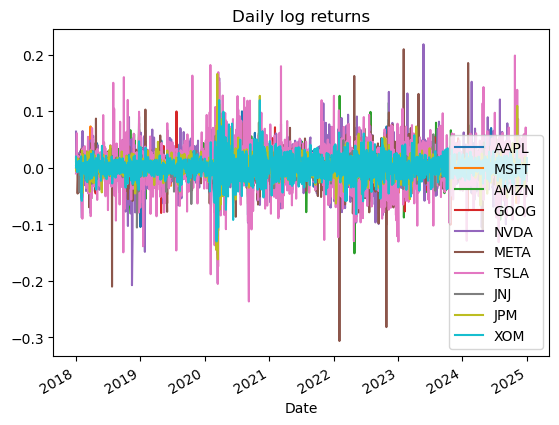

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
from pathlib import Path

# load your historical returns (e.g. daily log returns)
# Get current notebook's folder
notebook_dir = Path().resolve()

# Walk up until we hit "2025model_project"
project_root = notebook_dir
while project_root.name != "2025model_project" and project_root != project_root.parent:
    project_root = project_root.parent

data_path = project_root / "data" / "processed" / "returns.csv"

returns = pd.read_csv(data_path, index_col=0, parse_dates = True)
returns = returns.squeeze() 
returns = returns.dropna()

# check basic stats
print(returns.describe())
returns.plot(title = 'Daily log returns')
plt.show()